In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import copy
import pandas as pd
%matplotlib inline

In [2]:
import pyram as pr
pr.cwd('example_data')
pr.charge_lib('short')

Charging pure spectra library, needs around a minute ....
Done. Good work!


In [3]:
pr.read_omnic_map('omnic_map.map')

INFO:
    file name =  omnic_map.map
    10 x 10 Raman map
    steps = 100 um (x), 100 um (y)
    from 50.481689 to 3999.981689, step = 0.964233, # of channels = 4097
    absolute coordinates: X = [-12552.000000 - -11652.000000]um, Y = [-9186.000000 - -8286.000000]um


array([[[[  50.48168945,   51.44592285,   52.41015625, ...,
          3998.05322266, 3999.01745605, 3999.98168945],
         [ 217.80899048,  219.30050659,  220.39430237, ...,
            16.49561501,   16.47070694,   16.24456596]],

        [[  50.48168945,   51.44592285,   52.41015625, ...,
          3998.05322266, 3999.01745605, 3999.98168945],
         [ 210.91593933,  212.80799866,  214.02284241, ...,
            17.25524139,   16.93386459,   16.526968  ]],

        [[  50.48168945,   51.44592285,   52.41015625, ...,
          3998.05322266, 3999.01745605, 3999.98168945],
         [ 225.09703064,  224.51358032,  224.43533325, ...,
            15.77573299,   16.37203407,   17.22368813]],

        ...,

        [[  50.48168945,   51.44592285,   52.41015625, ...,
          3998.05322266, 3999.01745605, 3999.98168945],
         [ 516.33282471,  520.44720459,  523.86425781, ...,
            27.34230995,   27.24382401,   27.53317642]],

        [[  50.48168945,   51.44592285,   52.41015

In [3]:
pr.ls()

['Sample01_A_10x6s_633nm_G1200_F100__Ox100LWD.txt', 'Sample01_A_Ox100LWD_wl.jpg', 'Sample01_B_10x30s_633nm_G1200_F1__Ox100LWD.txt', 'Sample01_B_Ox100LWD_nl.jpg', 'Sample01_Bmap_10000x10000um_Ox10.jpg', 'Sample01_C_10x20s_633nm_G1200_F10__Ox100LWD.txt', 'Sample01_C_Ox10_nl.jpg', 'Sample01_D_6x4s_633nm_G1200_F100__Ox10.txt', 'Sample01_D_Ox10_nl.jpg', 'Sample01_E_6x4s_633nm_G1200_F100__Ox100LWD.txt', 'Sample01_F_10x5s_633nm_G1200_F0_1__Ox100LWD.txt', 'Sample01_F_Ox100LWD_nl.jpg', 'Sample01_F_Ox10_nl.jpg', 'Sample01_F_Ox50_nl.jpg', 'Sample01_G_6x10s_633nm_G1200_F10__Ox100LWD.txt', 'Sample01_G_Ox100LWD_wl.jpg', 'Sample01_G_Ox10_nl.jpg', 'Sample01_H_10x10s_633nm_G1200_F10__Ox100LWD.txt', 'Sample01_H_Ox10_nl.jpg', 'Sample01_I_10x10s_633nm_G1200_F25__Ox100LWD.txt', 'Sample01_I_Ox4_nl.jpg', 'Sample01_J_10x5s_633nm_G1200_F10__Ox100LWD.txt', 'Sample01_J_Ox10_nl.jpg', 'Sample01_J_Ox4_nl.jpg', 'Sample01_K_10x10s_633nm_G1200_F10__Ox100LWD.txt', 'Sample01_K_Ox10_nl.jpg', 'Si_calibration_A_60x1s_633nm

txt0  ->  Sample01_A_10x6s_633nm_G1200_F100__Ox100LWD.txt
txt1  ->  Sample01_B_10x30s_633nm_G1200_F1__Ox100LWD.txt
txt2  ->  Sample01_C_10x20s_633nm_G1200_F10__Ox100LWD.txt
txt3  ->  Sample01_D_6x4s_633nm_G1200_F100__Ox10.txt
txt4  ->  Sample01_E_6x4s_633nm_G1200_F100__Ox100LWD.txt
txt5  ->  Sample01_F_10x5s_633nm_G1200_F0_1__Ox100LWD.txt
txt6  ->  Sample01_G_6x10s_633nm_G1200_F10__Ox100LWD.txt
txt7  ->  Sample01_H_10x10s_633nm_G1200_F10__Ox100LWD.txt
txt8  ->  Sample01_I_10x10s_633nm_G1200_F25__Ox100LWD.txt
txt9  ->  Sample01_J_10x5s_633nm_G1200_F10__Ox100LWD.txt
txt10  ->  Sample01_K_10x10s_633nm_G1200_F10__Ox100LWD.txt
txt11  ->  Si_calibration_A_60x1s_633nmnm_G1200_F100__Ox100.txt
sum(Y-XW) =  -1936381.161335103
message =  Optimization terminated successfully. (HiGHS Status 7: Optimal)
# of iter =  249


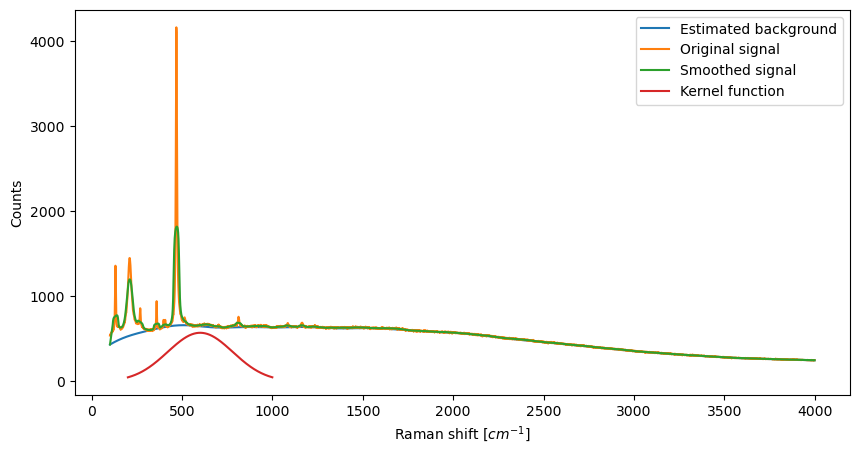

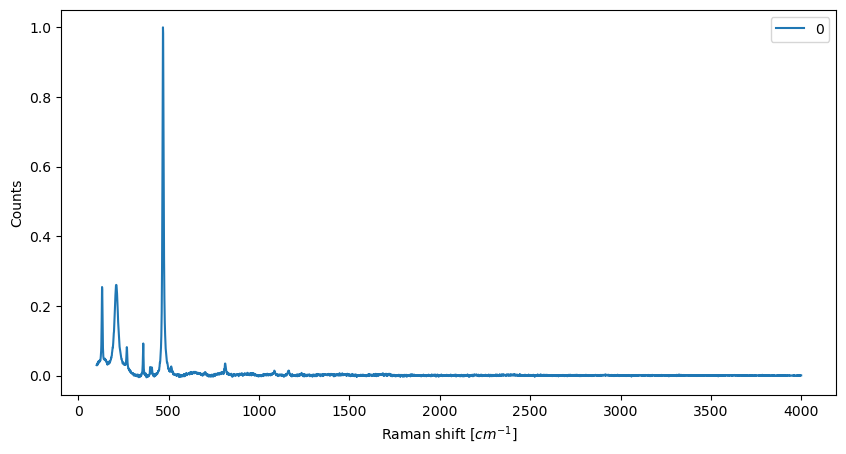

In [4]:
pr.set_alias()
S = pr.type2spectra('txt2')
S=pr.interpol(S)
S_nobkg= pr.bkg_subtraction(S,sigma=180,plot=True)
pr.plot(S_nobkg)

  alias          name     match
0  sch0        Quartz  0.969567
1  sch1        Albite  0.439356
2  sch2      Titanite  0.371141
3  sch3    Microcline  0.342978
4  sch4    Phlogopite  0.337780
5  sch5  Chalcopyrite  0.333438
6  sch6    Orthoclase  0.300039
7  sch7      Jarosite  0.253821
8  sch8       Amesite  0.251342
9  sch9      Pimelite  0.244256


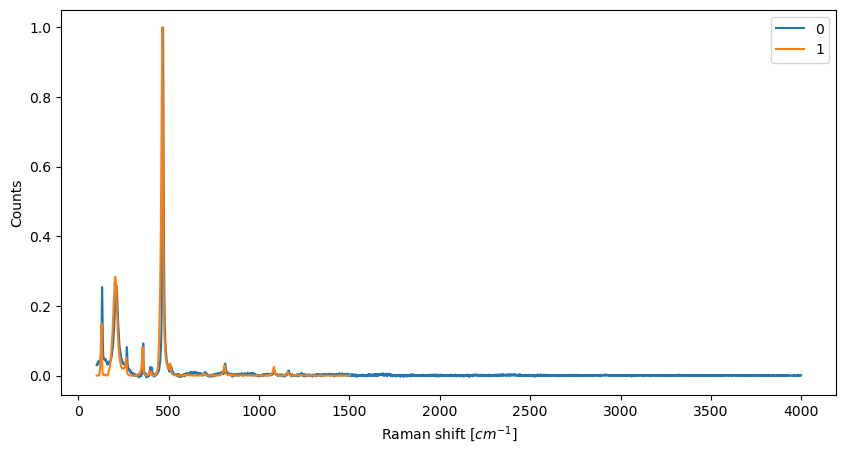

In [9]:
pr.search(S_nobkg,5,first=10);
pr.plot([S_nobkg,'sch0'])

trying N = 1 ; resulting in 27 combinations
trying N = 2 ; resulting in 351 combinations
best at N = 1


,combination,match
0,[Quartz__X080015__Raman__780],0.955966
1,[Quartz__X080016__Raman__780],0.955011
2,[Scotlandite__R060764__Raman__785],0.777427
3,[Sulphur__R040135__Raman__532],0.764633
4,[Epistolite__R070396__Raman__785],0.711785
5,[Cassiterite__R040072__Raman__785],0.562636
6,[Karpatite__R060162__Raman__785],0.492772
7,[Jokokuite__R070102__Raman__785],0.419263
8,[Nahcolite__R070237__Raman__785],0.304548
9,[Roubaultite__R080131__Raman__780],0.297573


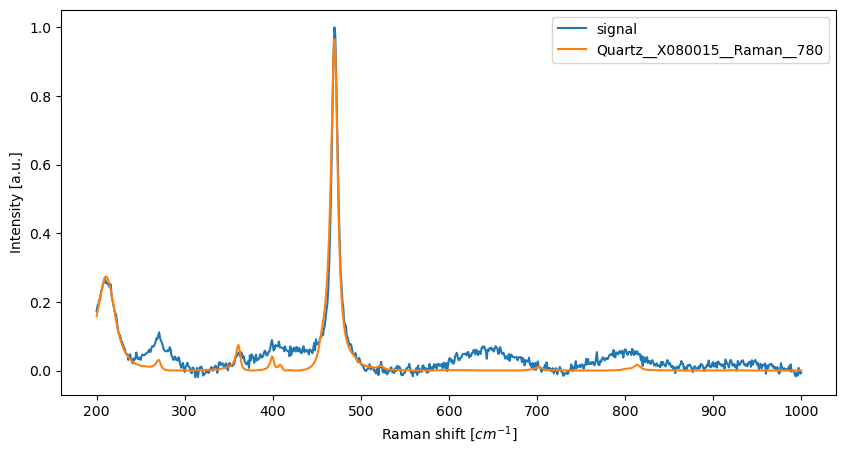

In [7]:
pr.NDsearch(S_nobkg, 5, improvement_th=0.1,verbose=False, set_min=200, set_max=1000)

  alias                          name
0  lib0  Sulphur__R050006__Raman__514


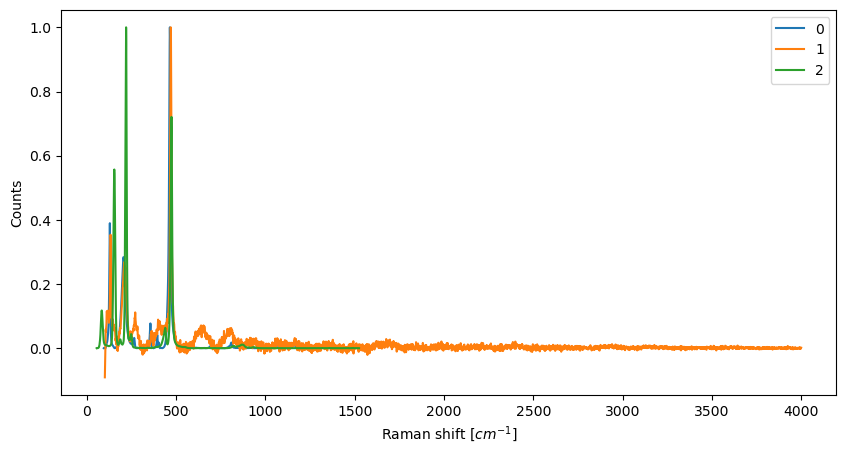

In [10]:
pr.plot(['sch0',S_nobkg])
pr.lib_names('Sulphur__R050006__Raman__514')
S=pr.type2spectra('lib0')
pr.replot(S)